<a href="https://colab.research.google.com/github/latifkara/MedicalCostAnalysis/blob/main/MedicalCostAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Creating a Google Colaboratory File

## 2. Importing Required Libraries





#### Import the required libraries for the project to the Colab environment.


In [1]:
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

#### Import Pandas, NumPy, Seaborn, Matplotlib and Sklearn libraries for data analysis


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## 3. Perform An Exploratory Data Analysis

**Yorum Satırları eklemeye unutma**

####  Analyze the data and draw meaningful conclusions from the data

In [3]:
df = pd.read_csv("/content/insurance.csv")

In [4]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
df.columns = [col.upper() for col in df.columns]

In [7]:
df.describe([0, 0.05, 0.50, 0.75, 0.95, 0.99]).T

,count,mean,std,min,0%,5%,50%,75%,95%,99%,max
AGE,1338.0,39.207025,14.049960,18.0000,18.0000,18.0000,39.000,51.000000,62.000000,64.000000,64.00000
BMI,1338.0,30.663397,6.098187,15.9600,15.9600,21.2560,30.400,34.693750,41.106000,46.407900,53.13000
CHILDREN,1338.0,1.094918,1.205493,0.0000,0.0000,0.0000,1.000,2.000000,3.000000,5.000000,5.00000
CHARGES,1338.0,13270.422265,12110.011237,1121.8739,1121.8739,1757.7534,9382.033,16639.912515,41181.827787,48537.480726,63770.42801


##### ○ Examine the distribution of Bmi (Body Mass Index)


<Axes: >

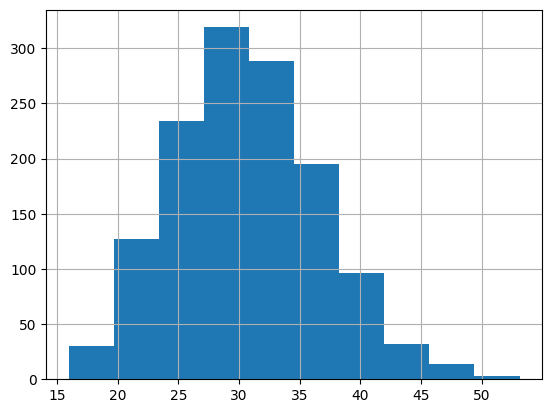

In [8]:
df["BMI"].hist()

BMI Görselinden şu yorumları çıkartabiliriz:


*   Veriler normal dağılmış.
*   Aykırı değer bulunmamaktadır.
*   En çok tekrar eden endeks 30'dır.





##### ○ Examine the relationship between “smoker” and “charges”


In [9]:
df.groupby("SMOKER").agg({"CHARGES": "mean"})

,CHARGES
SMOKER,
no,8434.268298
yes,32050.231832


sigara içenlerin tıbbi mesrafları sigara içmeyenlere göre daha fazladır, sigara içmenin hastaneye gitmeye sepeb olmaktadır.

##### ○ Examine the relationship between “smoker” and “region”.


In [10]:
region_smoker = df.groupby("REGION").agg({"SMOKER": "value_counts"})
region_smoker.columns = ["COUNT"]
region_smoker.sort_values('COUNT', ascending=False)

,,COUNT
REGION,SMOKER,
southeast,no,273
northwest,no,267
southwest,no,267
northeast,no,257
southeast,yes,91
northeast,yes,67
northwest,yes,58
southwest,yes,58


Analiz sonucunda şunu söyleyebiliriz:


*   Sigara içmeyenlerin toplam sayısı sigara içenlerden daha fazladır.
*   sigara içenler güney bölgesinde daha fazladır.



##### ○ Examine the relationship between “bmi” and “sex”.


In [11]:
df.SEX.value_counts()

male      676
female    662
Name: SEX, dtype: int64

In [12]:
df.groupby("SEX").agg({"BMI": ["mean", "sum", "count"]})

BMI                 
             mean        sum count
SEX                               
female  30.377749  20110.070   662
male    30.943129  20917.555   676

tabloya baktığımızda erkeklerin sayısı kadınlardan az bir farkla daha fazladır, erkeklerin vücut kütle indeksi (BMI) kadınlara göre daha fazladır.

##### ○ Find the "region" with the most "children".


In [13]:
REGION_COUNT = df.groupby("CHILDREN").agg({"REGION": "value_counts"})
REGION_COUNT.head(1)

,,REGION
CHILDREN,REGION,
0,southeast,157


Gelen sonuca göre en çok çocuğa sahip olan böge güneydoğu bölgesidir.


##### ○ Examine the relationship between “age” and “bmi”.

<Axes: xlabel='AGE', ylabel='BMI'>

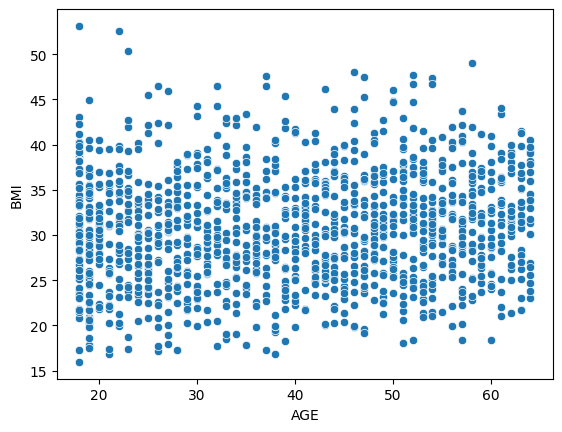

In [14]:
sns.scatterplot(data=df, x="AGE", y="BMI")

Yaş ile vücut kütle indeksi (BMI) aralarındaki ilişkilerine baktığımızda, iki değişken arasında korelasyon olmadığını diyebiliriz.

<Axes: xlabel='AGE', ylabel='BMI'>

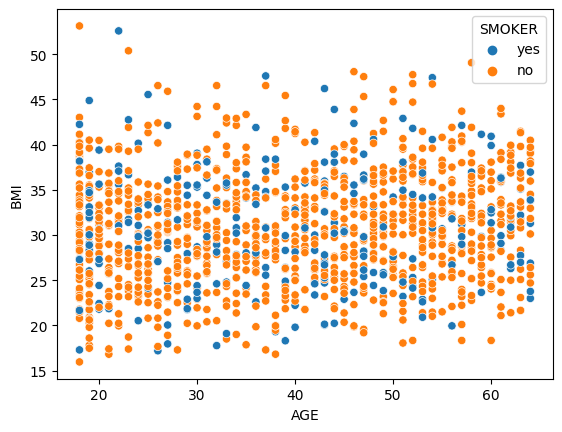

In [15]:
sns.scatterplot(data=df, x="AGE", y="BMI", hue="SMOKER")

In [16]:
age_labels = pd.cut(df["AGE"], bins=[0, 10, 18, 25, 40, df["AGE"].max()])
df_copy = df.copy()
df_copy["AGE_LABELS"] = age_labels
df_copy.groupby("AGE_LABELS").agg({"BMI": "mean"})

,BMI
AGE_LABELS,
"(0, 10]",NaN
"(10, 18]",31.326159
"(18, 25]",29.623397
"(25, 40]",30.131684
"(40, 64]",31.308257


Yaş değerlerini cut metodu ile yaş grubuna ayırdım, yaş gruba kırımında BMI ortalamasını incelledim.

##### ○ Examine the relationship between “bmi” and “children”.


In [17]:
df.groupby("CHILDREN").agg({"BMI": "mean"})

,BMI
CHILDREN,
0,30.550296
1,30.623148
2,30.978104
3,30.684331
4,31.391200
5,29.605000


<Axes: xlabel='CHILDREN', ylabel='BMI'>

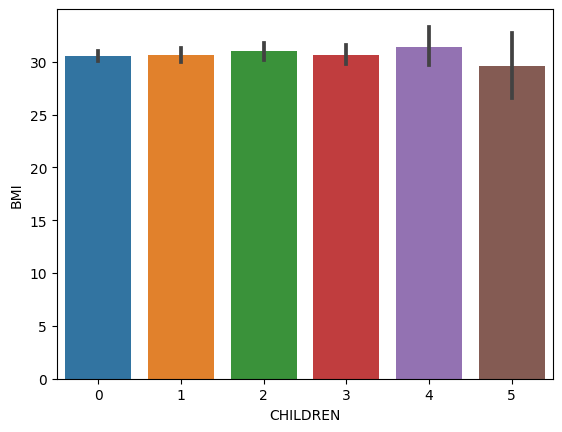

In [18]:
sns.barplot(data=df, x='CHILDREN', y = 'BMI')

Cocuk sayisi ile vücut kütle indeksi (BMI) arasında ilişkiye baktığımızda 4 yaşında çocuğa sahip vücut kütle indeksleri diğer insanlardan daha fazladır.

##### ○ Is there an outlier in the "bmi" variable? Please review.


{'whiskers': [<matplotlib.lines.Line2D at 0x7c47443d33d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7c47443d3910>,
 'boxes': [<matplotlib.lines.Line2D at 0x7c47443d3130>],
 'medians': [<matplotlib.lines.Line2D at 0x7c47443d3e50>],
 'fliers': [<matplotlib.lines.Line2D at 0x7c4744408130>],
 'means': []}

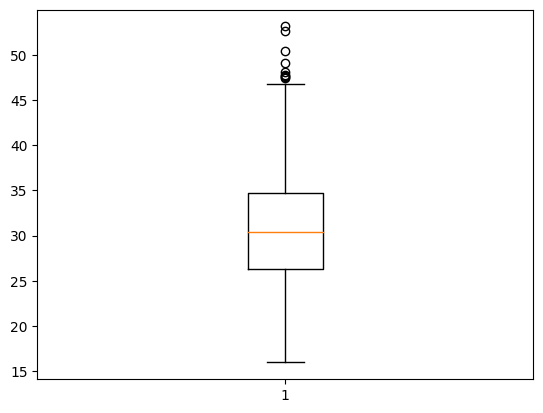

In [19]:
plt.boxplot(df["BMI"])

kutu grafiğe baktığımızda üst sınırda aykırı değer olduğunu gözlemleyebiliriz.

##### ○ Examine the relationship between “bmi” and “charges”.

<Axes: xlabel='BMI', ylabel='CHARGES'>

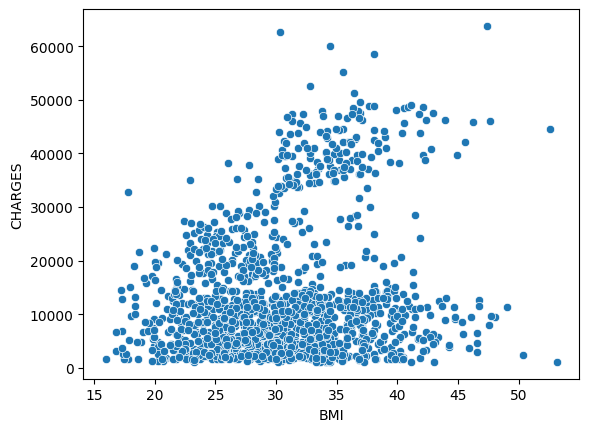

In [20]:
sns.scatterplot(data=df, x = "BMI", y= "CHARGES")

Vücut kütle indeksi (BMI) ile tıbbi mesrafları arasında korelayson olduğunu söyleyebiliriz.

##### ○ Examine the relationship between “region”, “smoker” and “bmi” using bar plot.


In [21]:
REGION_COUNT = df.REGION.value_counts()

<Axes: xlabel='REGION', ylabel='BMI'>

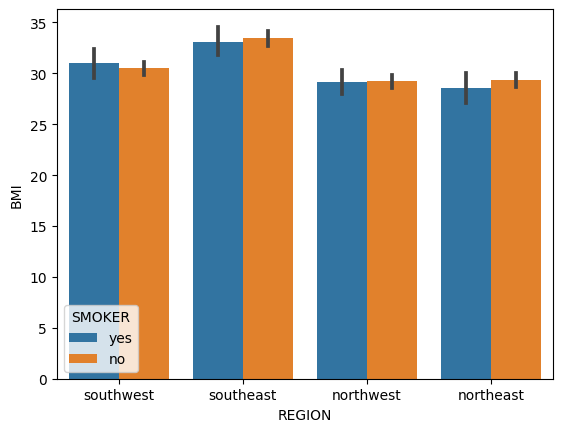

In [22]:
sns.barplot(x="REGION", y="BMI", hue="SMOKER", data=df)

Görsel analiz edersek güneydoğu bölgesinde vücut kütle indeksi(BMI) diğer bölgelerden daha fazladır, ve aynı şekilde bu bölgede sigara içmeyenlerin içenlerini göre daha fazladır.

## 4. Data Preprocessing


#### In this section, prepare the data you have, for training the model.


In [23]:
df.select_dtypes(include=["object", "category", "bool"]).any().any()

True

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   AGE       1338 non-null   int64  
 1   SEX       1338 non-null   object 
 2   BMI       1338 non-null   float64
 3   CHILDREN  1338 non-null   int64  
 4   SMOKER    1338 non-null   object 
 5   REGION    1338 non-null   object 
 6   CHARGES   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [25]:
cat_cols = [col for col in df.columns if df[col].nunique() < 10 and df.select_dtypes(include=["object", "category", "bool"]).any().any()]
num_but_cat = [col for col in df.columns if df[col].nunique() < 10 and
                                                       df[col].dtypes != "O"]
cat_cols = cat_cols + num_but_cat
num_cols = df.select_dtypes([int, float])
num_cols = [col for col in num_cols if col not in cat_cols]
num_cols = [col for col in num_cols if "CHARGES" not in col]

In [26]:
cat_cols

['SEX', 'CHILDREN', 'SMOKER', 'REGION', 'CHILDREN']

In [27]:
num_cols

['AGE', 'BMI']

#### Use Label Encoding and One-Hot Encoding techniques to deal with categorical variables.


In [28]:
binary_cols = [col for col in cat_cols if df[col].nunique() == 2]

In [29]:
binary_cols

['SEX', 'SMOKER']

In [30]:
df[binary_cols].head()

,SEX,SMOKER
0,female,yes
1,male,no
2,male,no
3,male,no
4,male,no


##### Label Encoder

In [31]:
for col in binary_cols:
  labelEncoder = LabelEncoder()
  df[col] = labelEncoder.fit_transform(df[col])
df.head()

,AGE,SEX,BMI,CHILDREN,SMOKER,REGION,CHARGES
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


##### One Hot Encoder

In [32]:
one_cols = [col for col in df.columns if 10 >= df[col].nunique() > 2]

In [33]:
df = pd.get_dummies(df, columns=one_cols, drop_first=True)

In [34]:
df.shape

(1338, 13)

##### Split your dataset into X_train,X_test, y_train, y_test.


In [35]:
X = df.drop("CHARGES", axis=1)
y = df["CHARGES"]

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

In [37]:
print("X train shape: ", X_train.shape)
print("Y train shape: ", y_train.shape)
print("X test shape: ", X_test.shape)
print("Y test shape: ", y_test.shape)

X train shape:  (936, 12)
Y train shape:  (936,)
X test shape:  (402, 12)
Y test shape:  (402,)


In [38]:
scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_train.head()

,AGE,SEX,BMI,SMOKER,CHILDREN_1,CHILDREN_2,CHILDREN_3,CHILDREN_4,CHILDREN_5,REGION_northwest,REGION_southeast,REGION_southwest
428,-1.281397,0,-2.254461,0,1,0,0,0,0,0,0,0
226,-0.788922,1,1.160160,0,0,0,0,0,0,0,1,0
867,1.251331,1,2.066654,0,1,0,0,0,0,0,0,1
397,-1.281397,1,0.028650,0,0,0,0,0,0,0,1,0
300,-0.226094,1,-0.529069,0,0,0,1,0,0,0,0,0


In [39]:
scaler = StandardScaler()
X_test[num_cols] = scaler.fit_transform(X_test[num_cols])
X_test.head()

,AGE,SEX,BMI,SMOKER,CHILDREN_1,CHILDREN_2,CHILDREN_3,CHILDREN_4,CHILDREN_5,REGION_northwest,REGION_southeast,REGION_southwest
7,-0.160640,0,-0.434615,0,0,0,1,0,0,1,0,0
999,-0.233940,0,-0.582771,0,0,0,0,0,0,1,0,0
1209,1.451958,1,1.187305,0,1,0,0,0,0,0,0,1
491,1.598558,0,-0.895545,0,0,0,0,0,0,0,1,0
625,-0.747039,0,-0.730927,0,0,0,0,0,0,1,0,0


## 5. Model Selection

##### Select several regression models and train them with the preprocessed data.


###### Linear Regression

In [40]:
Linear = LinearRegression()
Linear.fit(X_train, y_train)
Linear_pred = Linear.predict(X_test)

##### Examine the performances of the selected models using cross validation.


In [41]:
linear_rmse = np.mean(np.sqrt(-cross_val_score(Linear, X_train, y_train, cv=5, scoring="neg_mean_squared_error")))

In [42]:
print(linear_rmse)

6119.30521254735


###### Decision Tree Regression

In [43]:
cart = DecisionTreeRegressor()
cart.fit(X_train, y_train)
cart_pred = cart.predict(X_test)

In [44]:
cart_rmse = np.mean(np.sqrt(-cross_val_score(cart, X_train, y_train, cv=5, scoring="neg_mean_squared_error")))

In [45]:
print(cart_rmse)

6671.125737767364


##### Choose the best performing model

###### Sepebi yaz

## 6. Hyper-parameter Optimization


##### Optimize the hyper-parameters of the model selected in the previous step.


In [46]:
cart.set_params(max_depth=10, min_samples_split=4)
cart_pred = cart.predict(X_test)

In [47]:
cart_rmse = np.mean(np.sqrt(-cross_val_score(cart, X_train, y_train, cv=5, scoring="neg_mean_squared_error")))

In [48]:
print(cart_rmse)

6246.7594628325005


##### Optimize parameters with Grid Search. (Grid Search or Randomized Search)


In [49]:
cart_params = {'max_depth': range(1, 11),
               "min_samples_split": range(2, 20)}

In [50]:
cart_best_grid = GridSearchCV(cart,
                              cart_params,
                              cv=5,
                              n_jobs=-1,
                              verbose=True).fit(X_train, y_train)

Fitting 5 folds for each of 180 candidates, totalling 900 fits


In [51]:
cart_best_grid.best_params_

{'max_depth': 4, 'min_samples_split': 2}

In [52]:
cart_final = DecisionTreeRegressor(**cart_best_grid.best_params_, random_state=10).fit(X_train, y_train)

In [53]:
cart_final_rmse = np.mean(np.sqrt(-cross_val_score(cart_final, X_train, y_train, cv=5, scoring="neg_mean_squared_error")))

In [54]:
print(cart_final_rmse)

4755.8910872910365


## 7. Model Evaluation


##### Evaluate the optimized model using regression model evaluation metrics. (Ex. Mean Squared Error, Mean Absolute Error etc.)


###### Linear Regression Evaluate

In [55]:
mse_linear = mean_squared_error(y_test, Linear_pred)
mae_linear = mean_absolute_error(y_test, Linear_pred)

In [56]:
print("Mean Squared Error: ", mse_linear)
print("Mean Absolute Error: ", mae_linear)

Mean Squared Error:  37163478.10264882
Mean Absolute Error:  4375.240965352182


###### Decision Tree Regression

In [57]:
mse_cart = mean_squared_error(y_test, Linear_pred)
mae_cart = mean_absolute_error(y_test, Linear_pred)

In [58]:
print("Mean Squared Error: ", mse_cart)
print("Mean Absolute Error: ", mae_cart)

Mean Squared Error:  37163478.10264882
Mean Absolute Error:  4375.240965352182
